# Developing the Discrete Fourier Transform (DFT) algorithm

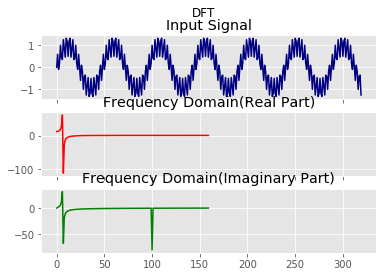

In [1]:
import mysignals as sigs
import matplotlib.pyplot as plt
from matplotlib import style
import math

def calc_dft(src):
    imx = [None]*(len(src)//2)
    rex = [None]*(len(src)//2)
    
    for j in range(len(src)//2):
        rex[j] = 0
        imx[j] = 0
    for k in range(len(src)//2):
        for i in range(len(src)):
            rex[k] = rex[k] + src[i]*math.cos(2*math.pi*k*i/len(src))
            imx[k] = imx[k] - src[i]*math.sin(2*math.pi*k*i/len(src))
    style.use('ggplot')
    
    f, plt_arr =plt.subplots(3,sharex=True)
    f.suptitle("DFT")
    plt_arr[0].plot(src,color='navy')
    plt_arr[0].set_title('Input Signal')
    plt_arr[1].plot(rex,color='red')
    plt_arr[1].set_title('Frequency Domain(Real Part)')
    plt_arr[2].plot(imx,color='green')
    plt_arr[2].set_title('Frequency Domain(Imaginary Part)')
    
    plt.show()
calc_dft(sigs.InputSignal_1kHz_15kHz)
    
    

# Developing DFT magnitude algorithm

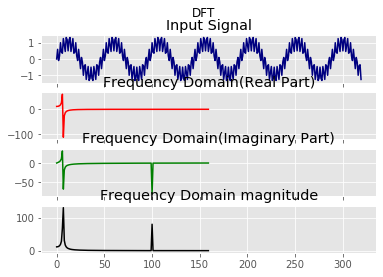

In [2]:
imx = []
rex = []
mag = []
def calc_dft_mag(src):
    global imx
    global rex
    global mag
    imx = [None]*(len(src)//2)
    rex = [None]*(len(src)//2)
    mag = [None]*(len(src)//2)
    
    for j in range(len(src)//2):
        rex[j] = 0
        imx[j] = 0
        
    for k in range(len(src)//2):
        for i in range(len(src)):
            rex[k] = rex[k] + src[i]*math.cos(2*math.pi*k*i/len(src))
            imx[k] = imx[k] - src[i]*math.sin(2*math.pi*k*i/len(src))
    
    for x in range(len(src)//2):
        mag[x] = math.sqrt(math.pow(rex[x],2)+math.pow(imx[x],2))
    
    
    style.use('ggplot')
    
    f, plt_arr =plt.subplots(4,sharex=True)
    f.suptitle("DFT")
    plt_arr[0].plot(src,color='navy')
    plt_arr[0].set_title('Input Signal')
    plt_arr[1].plot(rex,color='red')
    plt_arr[1].set_title('Frequency Domain(Real Part)')
    plt_arr[2].plot(imx,color='green')
    plt_arr[2].set_title('Frequency Domain(Imaginary Part)')
    plt_arr[3].plot(mag,color='black')
    plt_arr[3].set_title('Frequency Domain magnitude')
    
    plt.show()
calc_dft_mag(sigs.InputSignal_1kHz_15kHz)

# Developing the Inverse Discrete Fourier Transform algorithm

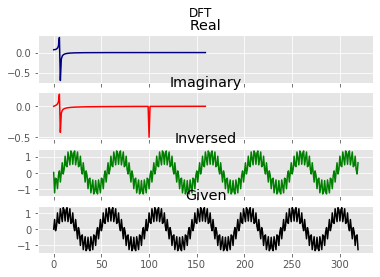

In [3]:
sig_idft = []
def plot_signal(sig1,sig2,sig3,sig4):
    style.use('ggplot')
    
    f, plt_arr =plt.subplots(4,sharex=True)
    f.suptitle("DFT")
    plt_arr[0].plot(sig1,color='navy')
    plt_arr[0].set_title('Real')
    plt_arr[1].plot(sig2,color='red')
    plt_arr[1].set_title('Imaginary')
    plt_arr[2].plot(sig3,color='green')
    plt_arr[2].set_title('Inversed')
    plt_arr[3].plot(sig4,color='black')
    plt_arr[3].set_title('Given')
    
    plt.show()

def calc_idft(rex,imx):
    global sig_idft
    sig_idft = [None]*(len(rex)*2)
    
    for i in range(len(sig_idft)):
        sig_idft[i] = 0
    
    for x in range(len(rex)):
        rex[x] = rex[x]/len(rex)
        imx[x] = imx[x]/len(imx)
    for k in range(len(rex)):
        for i in range(len(rex)*2):
            sig_idft[i] = sig_idft[i]+rex[k]*math.cos(2*math.pi*k*i/(len(rex)*2))+imx[k]*math.sin(2*math.pi*k*i/(len(rex)*2))        
calc_idft(rex,imx)        
plot_signal(rex,imx,sig_idft,sigs.InputSignal_1kHz_15kHz)    

# Computing the IDFT of an ECG signal

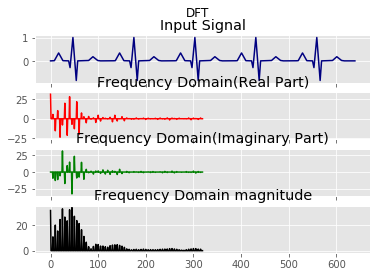

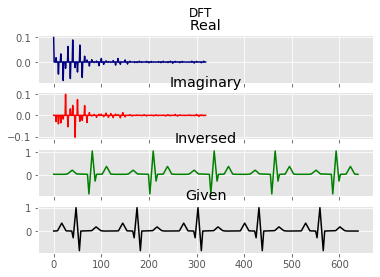

In [5]:
imx = []
rex = []
mag = []
sig_idft = []
calc_dft_mag(sigs.ecg_signal)
calc_idft(rex,imx)
plot_signal(rex,imx,sig_idft,sigs.ecg_signal)

# Fast Fourier Transform

/home/asus/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/asus/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Magnitude')

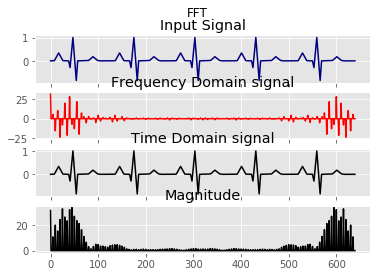

In [10]:
from scipy.fftpack import fft,ifft
import numpy as np

freq_domain_signal = fft(sigs.ecg_signal)
time_domain_signal = ifft(freq_domain_signal)

magnitude = np.abs(freq_domain_signal)

style.use('ggplot')
f, plt_arr =plt.subplots(4,sharex=True)
f.suptitle("FFT")
plt_arr[0].plot(sigs.ecg_signal,color='navy')
plt_arr[0].set_title('Input Signal')
plt_arr[1].plot(freq_domain_signal,color='red')
plt_arr[1].set_title('Frequency Domain signal')
plt_arr[2].plot(time_domain_signal,color='black')
plt_arr[2].set_title('Time Domain signal')
plt_arr[3].plot(magnitude,color='black')
plt_arr[3].set_title('Magnitude')